## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


c:\Users\ed069\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


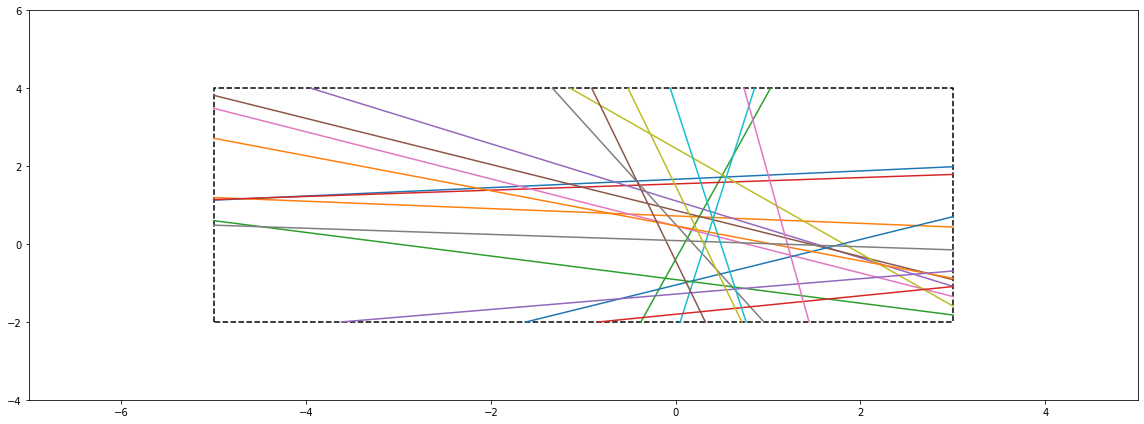

In [3]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(b, bias=0, box=[0, 0, 1, 1]):
    lx, ly, ux, uy = box
    b1, b2 = b

    intersection_points = []

    # handle degenerate case where both b1 and b2 are zero
    if b1 == 0 and b2 == 0:
        if bias == 0:
            return [], []
        else:
            return [], []

    # handle vertical lines (b1 == 0)
    if b1 == 0:
        # equation simplifies to b2 * y + bias = 0 => y = -bias / b2
        if b2 != 0:
            y = -bias / b2
            if ly <= y <= uy:
                intersection_points.append((lx, y))
                intersection_points.append((ux, y))
        # no intersection if y is outside the box
    # handle horizontal lines (b2 == 0)
    elif b2 == 0:
        # equation simplifies to b1 * x + bias = 0 => x = -bias / b1
        if b1 != 0:
            x = -bias / b1
            if lx <= x <= ux:
                intersection_points.append((x, ly))
                intersection_points.append((x, uy))
        # no intersection if x is outside the box
    # handle general case where both b1 and b2 are non-zero
    else:
        # intersection with left edge (x = lx)
        y_left = (-bias - b1 * lx) / b2
        if ly <= y_left <= uy:
            intersection_points.append((lx, y_left))

        # intersection with right edge (x = ux)
        y_right = (-bias - b1 * ux) / b2
        if ly <= y_right <= uy:
            intersection_points.append((ux, y_right))

        # intersection with bottom edge (y = ly)
        x_bottom = (-bias - b2 * ly) / b1
        if lx <= x_bottom <= ux:
            intersection_points.append((x_bottom, ly))

        # intersection with top edge (y = uy)
        x_top = (-bias - b2 * uy) / b1
        if lx <= x_top <= ux:
            intersection_points.append((x_top, uy))

    # remove duplicate points
    unique_points = []
    for point in intersection_points:
        if point not in unique_points:
            unique_points.append(point)

    # if there are exactly two unique intersection points, return them
    if len(unique_points) == 2:
        X, Y = zip(*unique_points)
        return list(X), list(Y)
    else:
        # no valid intersection or the hyperplane intersects the box at less than two distinct points
        return [], []
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")

If you did everything correct the result should look like the following picture.

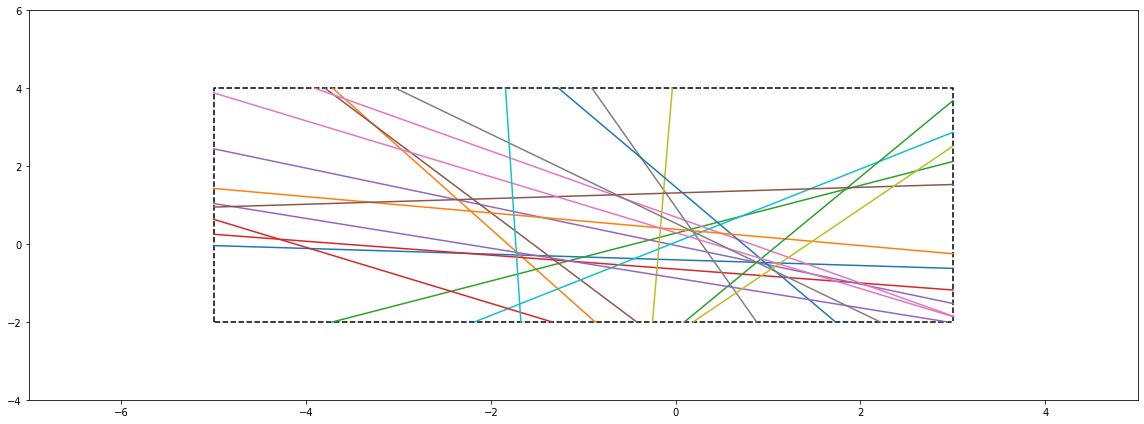

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    # your code here

# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2);
ax.set_ylim(ly-2, uy+2);
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")